# Comparing coffee quality and production among top coffee producing countries

In this branch, we attempt to compare coffee production, both in terms of volume produced and quality produced, with weather factors, as well 
as seeing if volume affects quality. As coffee drinkers, we are often told that 'quality' coffee is more scarce, so we've been led to believe that amount produced would lessen quality. As for weather factors, it seems most coffee is grown nearer to the equator, so perhaps temperatures are less correlated with coffee quality and production within that group of coffee producers. However, rainfall amounts can vary quite a bit among these countries, so rainfall should correlate with production.

Scatter plots should be the appropriate tool to compare these factors, as the data are bivariate. Individual Null hypotheses will be notated near the outputs below, five in total.

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress



In [124]:
# get total production data 
total_production_by_ctry_path = "data/total-production.csv"

#read csv file and convert into dataframe
total_df = pd.read_csv(total_production_by_ctry_path)
total_df.head()

,total_production (1k 60kg bags),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001


In [125]:
# get quality data frm Kaggle Dataset
coffee_qlty_by_ctry_path = "data/Coffee_Qlty_By_Country.csv"

#read csv file containing coffee data and convert into dataframe 
# 33 countries in this dataframe
quality_df = pd.read_csv(coffee_qlty_by_ctry_path)
quality_df.head()

,Country.of.Origin,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,AVG_Category.One.Defects,AVG_Category.Two.Defects,Rec_Cnt
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,0.128788,3.598485,132
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,0.000000,2.500000,2
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,0.094375,0.500000,0.000000,4.000000,16
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,0.062022,0.207650,0.377049,1.939891,183
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,0.083333,0.117647,0.352941,2.823529,51


In [126]:
# removing moisture, quakers, defects and record count so we can get a clean average quality
# The deleted values are pertinent but do not contribute to a mean calculation

quality_df =quality_df.drop(['AVG_Moisture', 'AVG_Quakers', 'AVG_Category.One.Defects', 'AVG_Category.Two.Defects', 'Rec_Cnt'], axis=1)



In [128]:
# compute avg quality, using all 9 remaining metrics
avg_quality = quality_df.mean(numeric_only = True, axis = 1)

# add avg quality to dataframe
avg_quality_df = quality_df
avg_quality_df['Avg_Quality'] = avg_quality

# show the dataframe
avg_quality_df.head()

,Country.of.Origin,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,Avg_Quality
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,8.315833
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,8.249444
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,8.364861
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,8.387250
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,8.347298


In [129]:
# eliminating all but the avg quality and country of original
ranked_quality_df = avg_quality_df[["Country.of.Origin", "Avg_Quality"]]

#ranking by avg quality
ranked_quality_df = ranked_quality_df.sort_values(('Avg_Quality'), ascending = False)
rename_ranked_quality_df = ranked_quality_df.rename(columns = {'Country.of.Origin' : 'Country'})
# show the ranked, sorted dataframe
rename_ranked_quality_df.head()

,Country,Avg_Quality
23,Papua New Guinea,8.646667
8,Ethiopia,8.603939
15,Kenya,8.510533
14,Japan,8.508889
22,Panama,8.451111


In [130]:
#compute avg total production over all covered years
avg_production = total_df.mean(numeric_only = True, axis = 1)

#add avg production to dataframe and rename
avg_total_df = total_df
avg_total_df['Avg_Production'] = avg_production

#show the dataframe
# 51 rows here, 33 in the quality dataframe
avg_total_df.head()

,total_production (1k 60kg bags),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Avg_Production
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874,45.256048
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687,116.146128
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836,41067.783976
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206,350.172424
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001,1076.504352


In [131]:
# eliminating all but the avg quality and country of original
ranked_total_df = avg_total_df[["total_production (1k 60kg bags)", "Avg_Production"]]

# renaming the data now that it is clean
rename_ranked_total_df = ranked_total_df.rename(columns = {'total_production (1k 60kg bags)': 'Country', 'Avg_Production' : 'Avg_production in 1k 60kg bags'})
# ranking by avg quality
rename_ranked_total_df = rename_ranked_total_df.sort_values(('Avg_production in 1k 60kg bags'), ascending = False)
# show the ranked, sorted dataframe
rename_ranked_total_df.head()

,Country,Avg_production in 1k 60kg bags
2,Brazil,41067.783976
54,Viet Nam,15156.584548
24,Colombia,11926.601600
5,Indonesia,8452.302438
30,Ethiopia,4880.789417


In [132]:
#take top 33 producers to match the 33 rows in the quality dataframe
production_sub_df = rename_ranked_total_df.head(33)
production_sub_df.head()

,Country,Avg_production in 1k 60kg bags
2,Brazil,41067.783976
54,Viet Nam,15156.584548
24,Colombia,11926.601600
5,Indonesia,8452.302438
30,Ethiopia,4880.789417


In [133]:
# merge the quality and total production databases
# only countries with data for both databses are kept- thus we have the top 21 producers of coffee
combined_df = pd.merge(production_sub_df, rename_ranked_quality_df, how = 'inner')


# output this as a csv file
combined_df.to_csv('Coffee_data.csv', index=False)
combined_df.head()

,Country,Avg_production in 1k 60kg bags,Avg_Quality
0,Brazil,41067.783976,8.315833
1,Colombia,11926.601600,8.387250
2,Indonesia,8452.302438,8.349556
3,Ethiopia,4880.789417,8.603939
4,India,4552.609690,8.147698


The r-value is 0.09454665703064241


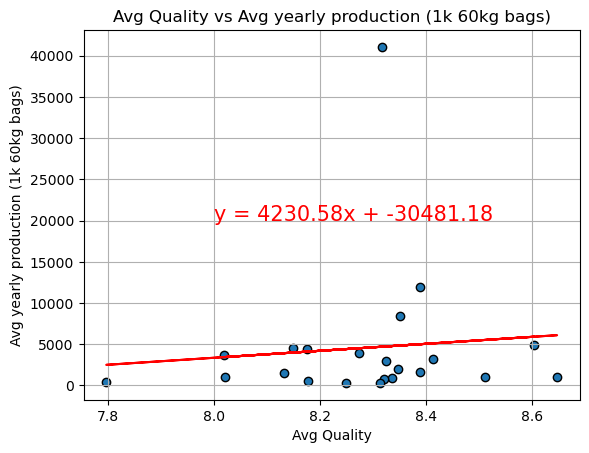

In [134]:
# Build the scatter plots for latitude vs. humidity
x_values = combined_df['Avg_Quality']
y_values = combined_df['Avg_production in 1k 60kg bags']
plt.scatter(x_values, y_values , alpha = 1, edgecolors = "k")

# Incorporate the other graph properties
plt.xlabel("Avg Quality")
plt.ylabel("Avg yearly production (1k 60kg bags)")
plt.title(f"Avg Quality vs Avg yearly production (1k 60kg bags)")
plt.grid(True)
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(8,20000),fontsize=15,color="red")
# Save the figure
plt.savefig("output_data/Fig1.png")
print(f'The r-value is {rvalue}')
# Show plot
plt.show()

In [135]:
stats.ttest_ind(x_values,y_values, equal_var = False)

TtestResult(statistic=-2.47346308489379, pvalue=0.02200192943603215, df=21.00000002097697)

# Comments on quality vs quantity of production

The null hypothesis here is that coffee quality is not affected by quantity. The low p value of 0.02 falls below the threshold of 0.05 and so we can probably reject the null hypothesis. There does seem to be a small positive corrleation between avg quality and amount of coffee produced. Meaning that as production goes up, so does quality. There could be many reasons for this, one being that Brazil produces an immense amount of high quality coffee, since Brazil produces far more coffee than the next several countries combined. 

In [136]:
# import a new dataframe for weather
# Data source: Mitchell, T.D., Carter, T.R., Jones, P.D., Hulme, M., New, M., 2003: 
# A Comprehensive Set of High-Resolution Grids of Monthly Climate for Europe and the Globe
weather_stats_path = "data/rainfall and temperature data.csv"

weather_stats_df = pd.read_csv(weather_stats_path)
weather_stats_df.head()



,Country,Avg Annual Rainfall (mm),"Avg Temperature, C"
0,Brazil,1761,24.95
1,Colombia,3240,24.51
2,Indonesia,2702,25.85
3,Ethiopia,848,22.41
4,India,1083,23.65


The r-value is 0.050851122206580335


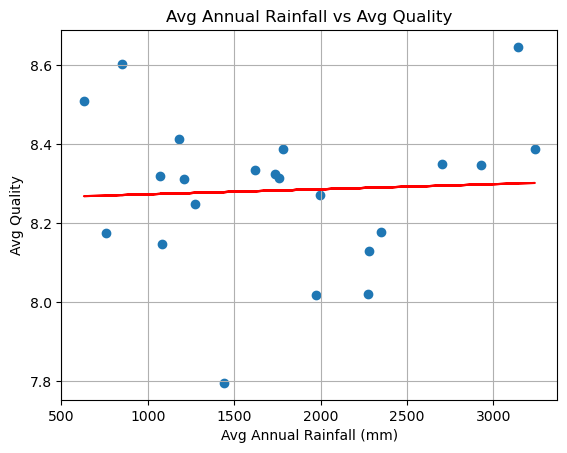

In [137]:
# Build a scatter plot for quality vs avg annual rainfall - rvq = rainfall vs quality
x_values_rvq = weather_stats_df['Avg Annual Rainfall (mm)']
y_values_rvq = combined_df['Avg_Quality']
plt.scatter(x_values_rvq,y_values_rvq)
# Incorporate the other graph properties
plt.xlabel("Avg Annual Rainfall (mm)")
plt.ylabel("Avg Quality")
plt.title(f"Avg Annual Rainfall vs Avg Quality")
plt.grid(True)
slope = linregress(x_values_rvq, y_values_rvq)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_rvq, y_values_rvq)
regress_values = x_values_rvq * slope + intercept
plt.plot(x_values_rvq, regress_values, "-r")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(7.8,1000),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/Fig2.png")
print(f'The r-value is {rvalue}')
# Show plot
plt.show()

In [138]:
stats.ttest_ind(x_values_rvp,y_values_rvp, equal_var = False)

TtestResult(statistic=-1.502513480827273, pvalue=0.14762507921578488, df=21.33112821432929)

# Comments on Avg Annual Rainfall vs quality of coffee

Here, the null hypothesis is that coffee quality and avg rainfall among the coffee producing countries have nothing to do with one another. The p value turns out to be about 0.15, so we cannot reject this null hypothesis. Most coffee producing regions do get significant rainfall, but the variance within this group of coffee producing nations does not appear to significantly affect the quality of coffee produced. 

The r-value is -0.02101022579365276


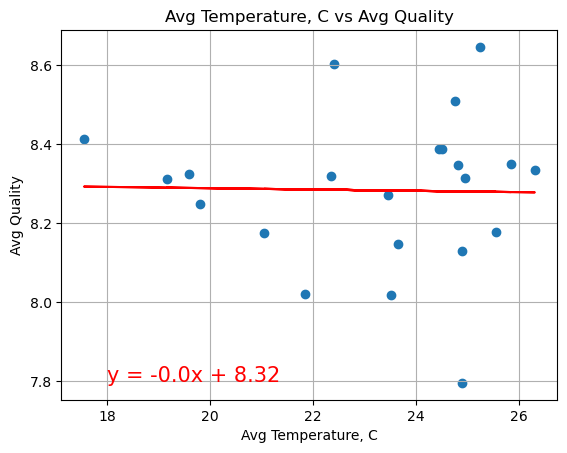

In [139]:
# Build a scatter plot for quality vs avg temp tvq = temp vs quality
x_values_tvq = weather_stats_df['Avg Temperature, C']
y_values_tvq = combined_df['Avg_Quality']
plt.scatter(x_values_tvq,y_values_tvq)
# Incorporate the other graph properties
plt.xlabel("Avg Temperature, C")
plt.ylabel("Avg Quality")
plt.title(f"Avg Temperature, C vs Avg Quality")
plt.grid(True)
slope = linregress(x_values_tvq, y_values_tvq)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_tvq, y_values_tvq)
regress_values = x_values_tvq * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_tvq, regress_values, "-r")
plt.annotate(line_eq,(18,7.8),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/Fig3.png")
print(f'The r-value is {rvalue}')
# Show plot
plt.show()

In [140]:
stats.ttest_ind(x_values_tvq,y_values_tvq, equal_var = False)

TtestResult(statistic=28.678251824531937, pvalue=1.7463780031270914e-18, df=21.264323244357406)

# Comments on the Avg temperature vs Avg Quality analysis

Here, the null hypothesis again is that temperature has nothing to do bean quality. The p value is tiny, though, well below the 0.05 threshold. We can therefore reject the null hypothesis. Again, most coffee producing countries are in tropical or subtropical climates, but the variance in temperature within these regions affects quality. The correlation is negative, with quality trending downward as temperatures go up, and this is our alternative hypothesis, which has a very high likelihood of being true. 

The r-value is 0.18717093476490188


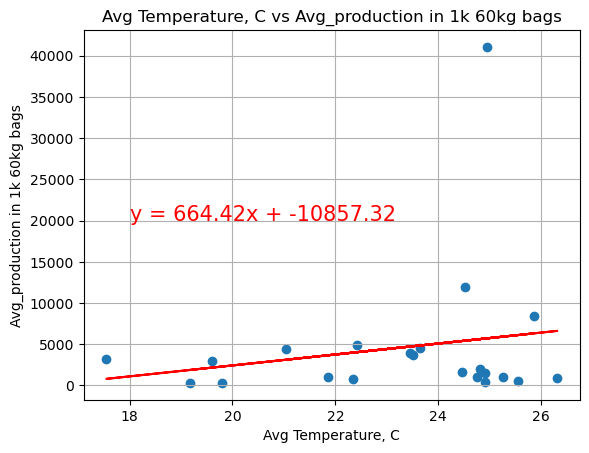

In [141]:
# Build a scatter plot for production vs avg temp; tvp = temp vs production
x_values_tvp = weather_stats_df['Avg Temperature, C']
y_values_tvp = combined_df['Avg_production in 1k 60kg bags']
plt.scatter(x_values_tvp,y_values_tvp)
# Incorporate the other graph properties
plt.xlabel("Avg Temperature, C")
plt.ylabel("Avg_production in 1k 60kg bags")
plt.title(f"Avg Temperature, C vs Avg_production in 1k 60kg bags")
plt.grid(True)
slope = linregress(x_values_tvp, y_values_tvp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_tvp, y_values_tvp)
regress_values = x_values_tvp * slope + intercept
plt.plot(x_values_tvp, regress_values, "-r")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(18,20000),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/Fig4.png")
print(f'The r-value is {rvalue}')
# Show plot
plt.show()

In [120]:
stats.ttest_ind(x_values_tvp,y_values_tvp, equal_var = False)

TtestResult(statistic=-2.4653587873734897, pvalue=0.022388825325110245, df=21.000003333032435)

# Comments on the avg temperature vs avg production amount analysis. 

The null hyopthesis here is that amount of  coffee production would be about the same across temperatures. The p value is 0.022, however, and well below the 0.05 threshold. We can reject the null hypothesis. Coffee production appears to rise as temperatures rise, though we did observe that the reverse is true of quality. Brazil, with a high avg temperature, potentially distorts the data somewhat, but even with smaller coffee producing countries, the trend seems to hold. Our alternative hypothesis that avg temperature does affect production is likely true. 

The r-value is 0.10105577284973338


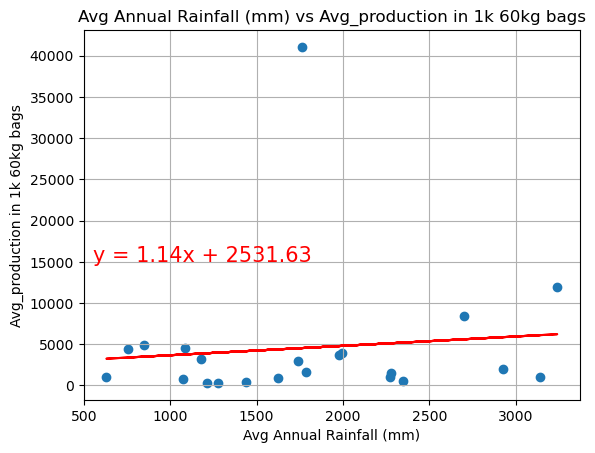

In [142]:
# Build a scatter plot for production vs avg rainfall; rvp = rainfall vs production
x_values_rvp = weather_stats_df['Avg Annual Rainfall (mm)']
y_values_rvp = combined_df['Avg_production in 1k 60kg bags']
plt.scatter(x_values_rvp,y_values_rvp)
# Incorporate the other graph properties
plt.xlabel("Avg Annual Rainfall (mm)")
plt.ylabel("Avg_production in 1k 60kg bags")
plt.title(f"Avg Annual Rainfall (mm) vs Avg_production in 1k 60kg bags")
plt.grid(True)
slope = linregress(x_values_rvp, y_values_rvp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_rvp, y_values_rvp)
regress_values = x_values_rvp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_rvp, regress_values, "-r")
plt.annotate(line_eq,(550,15000),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/Fig5.png")
print(f'The r-value is {rvalue}')
# Show plot
plt.show()

In [143]:
stats.ttest_ind(x_values_rvp,y_values_rvp, equal_var = False)

TtestResult(statistic=-1.502513480827273, pvalue=0.14762507921578488, df=21.33112821432929)

# Comments on the avg rainfall vs avg production analysis

In comparing avg rainfall to avg production amounts, we have a null hypothesis that says the amount of rainfall doesn't matter when it comes to amount of coffee produced. The p value is 0.148, so we cannot reject this null hyopthesis. Again, the massive production of Brazil with a rainfall amount that falls in the middle of these regions might distort the data. It appears, though, that rainfall amounts do not necessarily affect this metric. 